---
**License**

 Densities_distances_times_in NumCosmo_and_Colossus_libraries
 
 Wen Dec 22 09:40:00 2021\
 Copyright  2021\
 Sandro Dias Pinto Vitenti       <vitenti@uel.br> \
 Mariana Penna-Lima              <pennalima@gmail.com>\
 Ana Caroline Manso de Carvalho  <anacaroljc22@gmail.com>

---
---

 Densities_distances_times_in_NumCosmo_and_Colossus_libraries\
 Copyright (C) 2021 Sandro Dias Pinto Vitenti <vitenti@uel.br>, Mariana Penna-Lima <pennalima@gmail.com>, Ana   Caroline Manso de Carvalho <anacaroljc22@gmail.com>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Introduction

In this tutorial we will study some basic cosmology functions present in the NumCosmo library, for comparison purposes we will also be using the cosmology module from [Colossus](https://bitbucket.org/bdiemer/colossus/src/master/) (COsmology, haLO, and large-Scale StrUcture toolS). First of all we need to import both [NumCosmo](https://numcosmo.github.io/) and [NumCosmoMath](https://numcosmo.github.io/manual/ch02.html) libraries and the Colossus cosmology module. We also load python libraries necessary to make plots and other miscellaneous tools.

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import math
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
#plt.style.use('classic')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['legend.fontsize'] = 12
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import FloatSlider

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

from colossus.cosmology import cosmology

We now need to initialize the library and redirect its output to this notebook. For this it's necessary to call the main library configuration function, [`ncm_cfg_init ()`](https://numcosmo.github.io/manual/numcosmo-NcmCfg.html#ncm-cfg-init), it must be called before any other function of NumCosmo. 

In [2]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

To work with cosmology functions it's necessary, first of all, to define a cosmology. NumCosmo comes with <b> FOUR </b> diferent classes of cosmological models, [NcHICosmo](https://numcosmo.github.io/manual/NcHICosmo.html) that implements homogeneous and isotropic cosmological models, [NCHIPrim](https://numcosmo.github.io/manual/NcHIPrim.html) for implementing homogeneous and isotropic primordial models, lastly [NcPlanckFI](https://numcosmo.github.io/manual/NcPlanckFI.html) and [NcSNIADistCov](https://numcosmo.github.io/manual/NcSNIADistCov.html) for observational cosmology models. In this work we will only work with homogeneous and isotropic models, that is, we will use the class [NcHICosmo](https://numcosmo.github.io/manual/NcHICosmo.html). Using the function [`nc_hicosmo_log_all_models()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-log-all-models) we can log all models descending from the parent class.

In [3]:
Nc.HICosmo.log_all_models(Nc.HICosmo)

# Registred NcHICosmo:NcHICosmo are:
#  NcHICosmoQConst
#  NcHICosmoQLinear
#  NcHICosmoQSpline
#  NcHICosmoQRBF
#  NcHICosmoLCDM
#  NcHICosmoGCG
#  NcHICosmoIDEM2
#  NcHICosmoDE
#    NcHICosmoDEXcdm
#    NcHICosmoDECpl
#    NcHICosmoDEJbp
#  NcHICosmoQGRW
#  NcHICosmoVexp


Below the first line creates a cosmological model of the type NcHICosmoDEXcdm. That means, a Homogeneous and Isotropic cosmology (HICosmo) with [Dark Energy](https://en.wikipedia.org/wiki/Dark_energy) (DE) and [cold dark matter](https://en.wikipedia.org/wiki/Cold_dark_matter) (cdm).

In [4]:
cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, "NcHICosmoDEXcdm")

In [5]:
#mset = Ncm.MSet.new_array ([cosmo])
#mset.pretty_log ()

If we want to retrive details about a given cosmology we can use the function [`ncm_model_orig_params_log_all ()`](https://numcosmo.github.io/manual/NcmModel.html#ncm-model-orig-params-log-all).

In [6]:
cosmo.params_log_all ()

                 67.36                0.2568                   0.7                2.7245                  0.24                 3.046                0.0432                    -1


Let's now define the Colossus cosmology and redefine the NumCosmo parameters such that both libraries have the same cosmology.

In [7]:
# Colossus Cosmology

cosmo_col = cosmology.setCosmology('planck18',  {'interpolation': False, 'persistence': ''});

Omega_m0 = cosmo_col.Om0
Omega_de0 = cosmo_col.Ode0
Omega_r0 = 0.0
Omega_k0 = 0.0

Omega_c_col = cosmo_col.Om0 - cosmo_col.Ob0 # CDM density
Omega_b_col = cosmo_col.Ob0

# Redefining NumCosmo Cosmology

cosmo = Nc.HICosmo.new_from_name(Nc.HICosmo,"NcHICosmoDEXcdm{'massnu-length':<0>}")

cosmo.omega_x2omega_k ()
cosmo.param_set_by_name ("H0",        cosmo_col.H0)
cosmo.param_set_by_name ("Omegak",    cosmo_col.Ok(0.0))
cosmo.param_set_by_name ("w",         cosmo_col.w0)
#cosmo.param_set_by_name ("w1",        cosmo_col.wa)
cosmo.param_set_by_name ("Omegab",    Omega_b_col)
cosmo.param_set_by_name ("Omegac",    Omega_c_col)
#cosmo.param_set_by_name ("massnu_0",  Planck13.m_nu.value[2])
#cosmo.param_set_by_name ("ENnu",      cosmo_col.Neff - 3.0 * cosmo.E2Press_mnu (1.0e10) / (cosmo.E2Omega_g (1.0e10) * (7 / 8 * (4 / 11)**(4 / 3))))
cosmo.param_set_by_name ("ENnu",      cosmo_col.Neff)
cosmo.param_set_by_name ("Tgamma0",   cosmo_col.Tcmb0)

In [8]:
print(cosmo_col)

Cosmology "planck18" 
    flat = True, Om0 = 0.3111, Ode0 = 0.6888, Ob0 = 0.0490, H0 = 67.66, sigma8 = 0.8102, ns = 0.9665
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


Note that when defining the cosmology of the colossus we choose `interpolation = False`, this implies that the interpolation method is turned off leading to a more accurate calculation of quantities which takes more machine time but offers greater numerical precision. To better understand Colossus' optimization and accuracy process visit the link [Performance optimization and accuracy](https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#performance-optimization-and-accuracy).

## Standard calculations: Densities, Hubble Function and Normalized Hubble Function.

Let's perform some simple calculations such as densities, the Hubble Function and the Normalized Hubble Function.

### Densities

In the [NcHICosmo](https://numcosmo.github.io/manual/NcHICosmo.html) class there are functions to implement the contributions of density parameters of different components such as [`nc_hicosmo_E2Omega_c ()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-E2Omega-c), [`nc_hicosmo_E2Omega_b ()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-E2Omega-b), [`nc_hicosmo_E2Omega_r ()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-E2Omega-r) which calculates the cold dark matter, baryonic and total radiation density respectively. Realize that NumCosmo calculates the density parameters using the definition

\begin{equation}
E^2\Omega_i = \rho_i(z)/\rho_{crit,0},
\end{equation}

therefore it was necessary, for comparison purposes, to divide each function by [`nc_hicosmo_E2 ()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-E2) which is the normalized hubble function squared.

<Figure size 432x288 with 0 Axes>

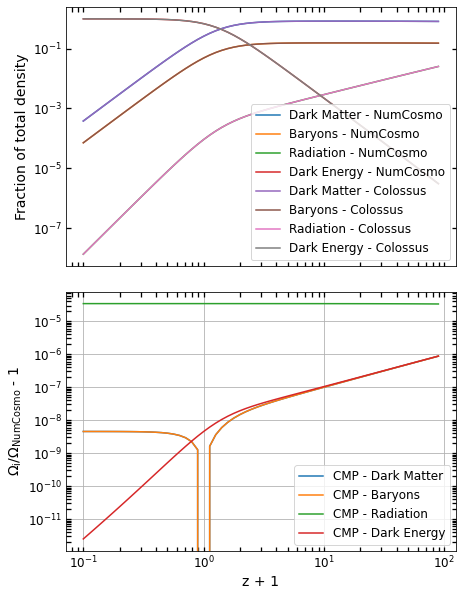

In [9]:
zp1 = 10**np.arange(-1.0, 2.0, 0.05)
z_a = zp1 - 1.0

# NumCosmo
E2 = np.array ([cosmo.E2 (z) for z in z_a])
n1 = time.time ()
Omega_c = np.array ([cosmo.E2Omega_c (z) for z in z_a]) / E2
n2 = time.time ()
Omega_b = np.array ([cosmo.E2Omega_b (z)  for z in z_a]) / E2
n3 = time.time () 
Omega_r = np.array ([cosmo.E2Omega_r (z)  for z in z_a]) / E2
n4 = time.time ()
Omega_L = np.array ([cosmo.E2Omega_de (z) for z in z_a]) / E2
n5 = time.time ()

# Colossus
c1 = time.time ()
O_b = cosmo_col.Ob(z_a)
c2 = time.time ()
O_dm = cosmo_col.Om(z_a) - O_b
c3 = time.time ()
O_de = cosmo_col.Ode(z_a)
c4 = time.time ()
O_r = cosmo_col.Or(z_a)
c5 = time.time ()

plt.figure ()

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace':0.1}, figsize=(7,10))

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel('Fraction of total density')
axs[1].set_xlabel('z + 1')
axs[0].plot(zp1, Omega_c, '-', lw = 1.5, label = 'Dark Matter - NumCosmo')
axs[0].plot(zp1, Omega_b, '-', lw = 1.5, label = 'Baryons - NumCosmo')
axs[0].plot(zp1, Omega_r, '-', lw = 1.5, label = 'Radiation - NumCosmo')
axs[0].plot(zp1, Omega_L, '-', lw = 1.5, label = 'Dark Energy - NumCosmo')
axs[0].plot(zp1, O_dm, '-', lw = 1.5, label = 'Dark Matter - Colossus')
axs[0].plot(zp1, O_b, '-', lw = 1.5, label = 'Baryons - Colossus')
axs[0].plot(zp1, O_r, '-', lw = 1.5, label = 'Radiation - Colossus')
axs[0].plot(zp1, O_de, '-', lw = 1.5, label = 'Dark Energy - Colossus')
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend (loc='best')

axs[1].plot(zp1, np.abs(O_dm/Omega_c - 1.0), '-', lw = 1.5, label = 'CMP - Dark Matter')
axs[1].plot(zp1, np.abs(O_b/Omega_b - 1.0), '-', lw = 1.5, label = 'CMP - Baryons')
axs[1].plot(zp1, np.abs(O_r/Omega_r - 1.0), '-', lw = 1.5, label = 'CMP - Radiation')
axs[1].plot(zp1, np.abs(O_de/Omega_L - 1.0), '-', lw = 1.5, label = 'CMP - Dark Energy')
axs[1].set_ylabel('$\Omega_{\mathrm{i}}/\Omega_{\mathrm{NumCosmo}}$ - 1')
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].legend (loc='best')
axs[1].grid ()

plt.savefig ("densities_first.pdf", dpi=300, bbox_inches='tight')

*RunTime*

Next, we also compute the time that each library takes to run the program, this step will be repeated in each subtopic of this notebook for reasons of comparison between the different libraries.

In [10]:
print('#----------------------------------------------------------------------------------')
print('# Fraction of total density, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# Dark Matter')
print('# - NumCosmo: \t %e ' %(n2 - n1))
print('# - Colossus: \t %e \n' %(c3 - c2))
print('# Baryons')
print('# - NumCosmo: \t %e ' %(n3 - n2))
print('# - Colossus: \t %e \n' %(c2 - c1))
print('# Radiation')
print('# - NumCosmo: \t %e ' %(n4 - n3))
print('# - Colossus: \t %e \n' %(c5 - c4))
print('# Dark Energy')
print('# - NumCosmo: \t %e ' %(n5 - n4))
print('# - Colossus: \t %e \n' %(c4 - c3))

#----------------------------------------------------------------------------------
# Fraction of total density, runtime in seconds 
#----------------------------------------------------------------------------------
# Dark Matter
# - NumCosmo: 	 2.622604e-04 
# - Colossus: 	 1.227856e-04 

# Baryons
# - NumCosmo: 	 2.515316e-04 
# - Colossus: 	 1.480579e-04 

# Radiation
# - NumCosmo: 	 2.846718e-04 
# - Colossus: 	 1.142025e-04 

# Dark Energy
# - NumCosmo: 	 2.465248e-04 
# - Colossus: 	 1.113415e-04 



### Hubble Function and Normalized Hubble Function

The function [`nc_hicosmo_H ()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-H) calculates the Hubble parameter, $H(z)$, as a function of redshift. 

In [11]:
Hubble_time = 1/cosmo.H0()
Hubble_time 

0.014779781259237365

<Figure size 432x288 with 0 Axes>

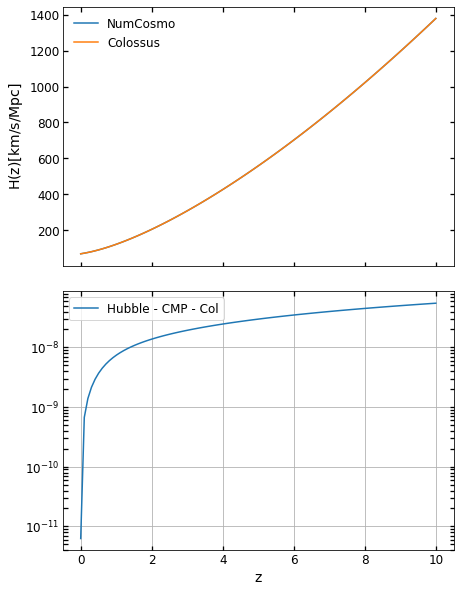

In [12]:
z_list = np.linspace (1.0E-3, 10.0, 100)
H_list = []

h0 = time.time ()
for z in z_list:
    H = cosmo.H(z)
    H_list.append(H)
h1 = time.time ()

h2 = time.time ()
H_col = cosmo_col.Hz(z_list)
h3 = time.time ()

cmp_H = np.array(H_list)
cmp_col_H = np.array( cosmo_col.Hz(z_list))

plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace':0.1}, figsize=(7,10))

axs[0].set_ylabel(r'${\mathrm{H(z)}}\mathrm{[km/s/Mpc]}$')
axs[0].plot(z_list, H_list, '-', lw=1.5, label = 'NumCosmo')
axs[0].plot(z_list, H_col , '-', lw=1.5, label = 'Colossus')
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend(loc='best', frameon=False)

axs[1].plot(z_list,np.abs(cmp_col_H/cmp_H - 1.0), '-', lw=1.5, label='Hubble - CMP - Col')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'${\mathrm{z}}$')
axs[1].legend (loc='best')
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].grid ()

plt.savefig('hubble_first.pdf', dpi=300, bbox_inches='tight')

*RunTime*

In [13]:
print('#----------------------------------------------------------------------------------')
print('# Hubble Function, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(h1 - h0))
print('# - Colossus: \t %e ' %(h3 - h2))

#----------------------------------------------------------------------------------
# Hubble Function, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 1.520634e-03 
# - Colossus: 	 2.655983e-04 


In the same way we can calculate the normalized Hubble function, $E(z)$, using the function [`nc_hicosmo_E ()`](https://numcosmo.github.io/manual/NcHICosmo.html#nc-hicosmo-E).

<Figure size 432x288 with 0 Axes>

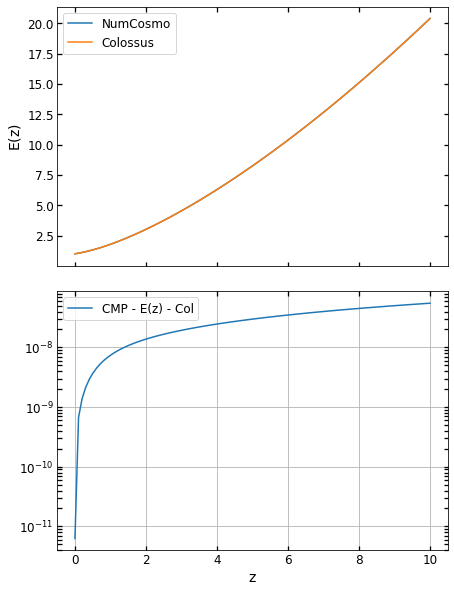

In [14]:
E_list = []
e0 = time.time ()
for z in z_list:
    E = cosmo.E(z)
    E_list.append(E)
e1 = time.time ()

e2 = time.time ()
E_col = cosmo_col.Ez(z_list)
e3 = time.time ()

cmp_E = np.array(E_list)
cmp_col_E = np.array( cosmo_col.Ez(z_list))

plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace':0.1}, figsize=(7,10))

axs[0].set_ylabel(r'$\mathrm{E(z)}$')
axs[0].plot(z_list, E_list, '-', lw=1.5,  label = 'NumCosmo')
axs[0].plot(z_list, E_col, '-', lw=1.5, label = 'Colossus')
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend(loc='best')

axs[1].plot(z_list, np.abs(cmp_col_E/cmp_E - 1.0), '-', lw=1.5, label='CMP - E(z) - Col')
axs[1].set_yscale('log')
axs[1].set_xlabel('z')
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].legend (loc='best')
axs[1].grid ()

plt.savefig('normalized_first.pdf', dpi=300, bbox_inches='tight')

*RunTime*

In [15]:
print('#----------------------------------------------------------------------------------')
print('# Normalized Hubble Function, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(e1 - e0))
print('# - Colossus: \t %e ' %(e3 - e2))

#----------------------------------------------------------------------------------
# Normalized Hubble Function, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 1.517057e-03 
# - Colossus: 	 1.947880e-04 


## Cosmological Distances and Time

Before using the functions that calculate distances and time related quantities in NumCosmo we need to initialize the [NcDistance](https://numcosmo.github.io/manual/NcDistance.html) object. This object computes the cosmological distances and time related quantities. The argument of the [`new`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-new) function corresponds to the maximum redshift $z_{max}$ up to which the [spline](https://en.wikipedia.org/wiki/Spline_interpolation) of the comoving distance will be prepared. The cosmological distances depend on the cosmological model. 

In [16]:
z_max = 10.0
dist = Nc.Distance.new (z_max)
dist.prepare(cosmo)

### Cosmic Time

The cosmological time, $t(z)$, is defines as,

\begin{equation}
t(z) = \int_z^\infty\frac{dz^{\prime}}{(1+z^{\prime})E(z^\prime)}.
\end{equation}

The function [`nc_distance_cosmic_time ()`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-cosmic-time) computes the cosmological time in NumCosmo.


<Figure size 432x288 with 0 Axes>

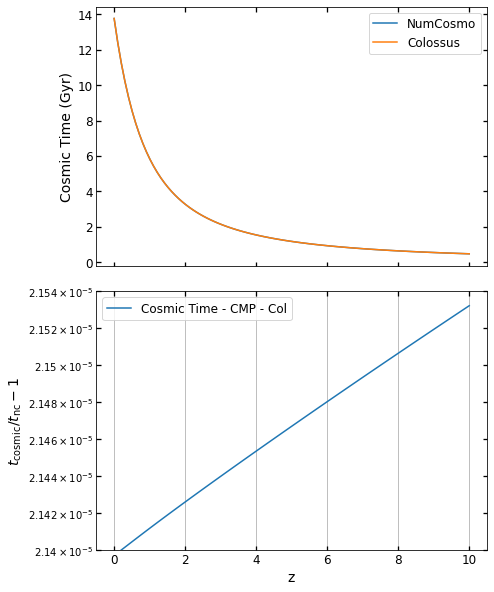

In [17]:
z_list = np.linspace (1.0E-3, 10.0, 100)

cosmic_list = []
cosmic_col_list = []
cmp1_list = []

t0 = time.time()
for z in z_list:
    cosmic_time = (dist.cosmic_time (cosmo,z)/cosmo.H0 ()) * (Ncm.C.kpc () / Ncm.C.year () / 1.0E9)
    cosmic_list.append (cosmic_time)
t1 = time.time()
    
cosmic_col_time = cosmo_col.age (z_list)
t2 = time.time()

cosmic_nc = np.array(cosmic_list)
cmp1 = np.abs(cosmic_col_time/cosmic_nc - 1.0)

plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace': 0.1}, figsize=(7, 10))

axs[1].set_xlabel (r"$\mathrm{z}$")
axs[1].set_ylim([2.14e-5, 2.154e-5])
axs[0].set_ylabel ("Cosmic Time (Gyr)")
axs[1].set_ylabel ("$t_{\mathrm{cosmic}}/t_{\mathrm{nc}} - 1$")
axs[1].set_yscale ("log")
axs[0].plot (z_list, cosmic_nc, '-', lw=1.5, label = "NumCosmo")
axs[0].plot (z_list, cosmic_col_time, '-', lw=1.5, label = "Colossus")
axs[1].plot (z_list, cmp1 , '-', lw=1.5, label = "Cosmic Time - CMP - Col")
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend(loc='best')
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].legend(loc='best')
axs[1].grid()

plt.savefig('cosmictime_first.pdf', dpi=300, bbox_inches='tight')

Realize that it was necessary to multiply the `nc_distance_cosmic_time ()` function by the factor (1/cosmo.H0) this happens because the calculation of cosmic time, in this case the integral, is dimensionless and the factor $1/H_0$ is not included, finally, we did the multiplication ([`Ncm.C.kpc ()`](https://numcosmo.github.io/manual/NcmC.html#ncm-c-kpc) / [`Ncm.C.year ()`](https://numcosmo.github.io/manual/NcmC.html#ncm-c-year) / 1.0E9) to convert the units of $s\cdot kpc/m$ to Gigayears.

*RunTime*

In [18]:
print('#----------------------------------------------------------------------------------')
print('# Cosmic time, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(t1 - t0))
print('# - Colossus: \t %e ' %(t2 - t1))

#----------------------------------------------------------------------------------
# Cosmic time, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 4.742622e-03 
# - Colossus: 	 1.287839e-01 


### Lookback Time

If a photon is emitted by a galaxy at a time $t_e$ and is observed by us at a time $t_0$, the difference $t_0 - t_e$ is called the lookback time, $t_{lb}$, defined as

$$t_{lb}(z) = \int^{z}_{0}\frac{dz^\prime}{(1+z^\prime)E(z^\prime)}.$$

We can use the function [`nc_distance_lookback_time ()`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-lookback-time) to calculate this expression.

<Figure size 432x288 with 0 Axes>

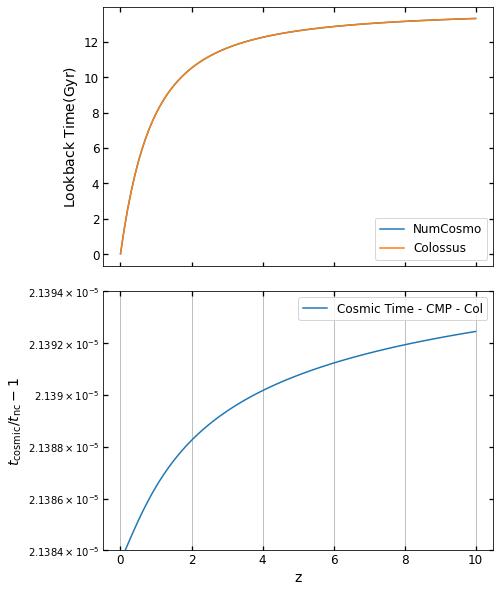

In [19]:
back_list = []
back_col_list = []
cmp2_list = []

bt0 = time.time()
for z in z_list:
    back_time = (dist.lookback_time (cosmo,z)/cosmo.H0 ()) * Ncm.C.kpc () / Ncm.C.year () / 1.0E9
    back_list.append (back_time)
bt1 = time.time()
    
back_col_time = cosmo_col.lookbackTime (z_list)
bt2 = time.time()
    
back_time_nc = np.array(back_list)
cmp2 = np.abs(back_col_time/back_time_nc - 1.0)

    

plt.figure ()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace': 0.1}, figsize = (7,10))

axs[1].set_yscale("log")
axs[1].set_xlabel (r"$\mathrm{z}$")
axs[1].set_ylim([2.1384e-5, 2.1394e-5])
axs[0].set_ylabel (r"$\mathrm{Lookback}\ \mathrm{Time(Gyr)}$")
axs[1].set_ylabel (r"$t_{\mathrm{cosmic}}/t_{\mathrm{nc}} - 1$")
axs[0].plot (z_list, back_time_nc, '-', lw=1.5, label = "NumCosmo")
axs[0].plot (z_list, back_col_time, '-', lw=1.5, label = "Colossus")
axs[1].plot (z_list, cmp2 , '-', lw=1.5, label = "Cosmic Time - CMP - Col")
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend(loc='best')
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].legend(loc='best')
axs[1].grid()

plt.savefig('lookback_first.pdf', dpi=300, bbox_inches='tight')


Again, we did the same process as in the cosmic time with respect to the unities conversion.

*RunTime*

In [20]:
print('#----------------------------------------------------------------------------------')
print('# Lookback Time, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(bt1 - bt0))
print('# - Colossus: \t %e ' %(bt2 - bt1))

#----------------------------------------------------------------------------------
# Lookback Time, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 4.024744e-03 
# - Colossus: 	 3.163576e-02 


### Comoving Distance

The comoving distance is defined as

$$d_c(z) = d_H \int_0^z \frac{dz^\prime}{E (z^\prime)},$$

where $d_H = \frac{c}{H_0}$ is the Hubble radius, $c$ is the speed of light and $E(z^\prime)$ is the normalized hubble function, i.e., 

$$E(z)\equiv \frac{H(z)}{H_0}.$$

The function [`nc_distance_comoving()`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-comoving) calculate the comoving distance.

<Figure size 432x288 with 0 Axes>

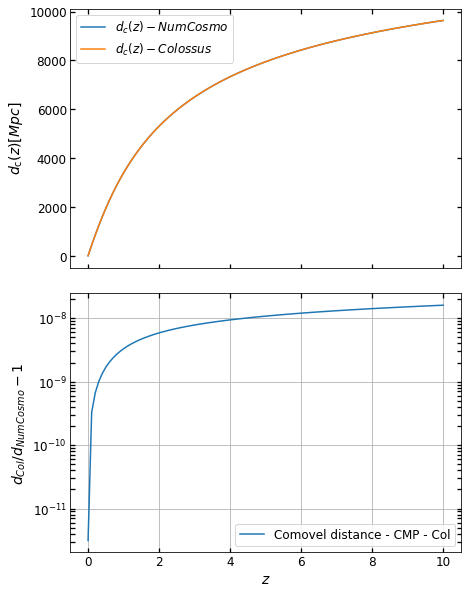

In [21]:
comoving_col_list = []
comoving_list = []
cmp3_list = []

cd0 = time.time()
for z in z_list:
    comoving = dist.comoving (cosmo, z)*cosmo.RH_Mpc () #Ncm.C.hubble_radius_hm1_Mpc ()
    comoving_list.append (comoving)
cd1 = time.time()

comoving_nc = np.array(comoving_list)    
comoving_col = cosmo_col.comovingDistance (z_max = z_list, transverse = False)/cosmo.h ()
#comoving_col_list.append (comoving_col)
cd2 = time.time()
cmp3 = np.abs (comoving_col/comoving_nc - 1)
#    cmp3_list.append (cmp3)

plt.figure()
fig, axs = plt.subplots (2, sharex = True, gridspec_kw={'hspace':0.1}, figsize = (7,10))

axs[0].set_ylabel(r"$d_\mathrm{c}(z)[Mpc]$")
axs[1].set_xlabel("$z$")
axs[1].set_ylabel("$d_{Col}/d_{NumCosmo} - 1$")
axs[1].set_yscale("log")
axs[0].plot (z_list, comoving_nc, '-', lw=1.5, label = "$d_c(z) - NumCosmo$")
axs[0].plot (z_list, comoving_col,'-', lw=1.5, label = "$d_c(z) - Colossus$")
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend(loc='best')


axs[1].plot (z_list, cmp3 , '-', lw=1.5, label = "Comovel distance - CMP - Col")
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].legend(loc='best')
axs[1].grid ()

plt.savefig("comovingdis_first.pdf", dpi=300, bbox_inches="tight")

*RunTime*

In [22]:
print('#----------------------------------------------------------------------------------')
print('# Comoving Distance, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(cd1 - cd0))
print('# - Colossus: \t %e ' %(cd2 - cd1))

#----------------------------------------------------------------------------------
# Comoving Distance, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 1.954556e-03 
# - Colossus: 	 2.874780e-02 


### Transverse, Luminosity and Angular Diameter distances.

The transverse comoving distance is given as follow,

\begin{eqnarray}
d_T = \left\{
\begin{array}{c l}
d_H\frac{1}{\sqrt{|\Omega_K|}}\sinh\left( \sqrt{\Omega_K} d_c/d_H  \right) & \text{for} \quad \Omega_K > 0 \\
d_c & \text{for} \quad \Omega_K = 0 \\
d_H \frac{1}{\sqrt{\vert \Omega_K \vert }} \sin \left( \sqrt{\vert \Omega_K \vert} d_c/d_H  \right) & \text{for} \quad \Omega_K < 0;
\end{array}\right.
\end{eqnarray}  
Using the definition above we have that the luminosity and angular diameter distances are respectively:

$$d_L(z) = (1 + z) d_M(z);$$

$$d_A(z) = \frac{d_M(z)}{(1 + z)}.$$

The functions [`nc_distance_transverse  ()`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-transverse), [`nc_distance_luminosity ()`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-luminosity) and [`nc_distance_angular_diameter ()`](https://numcosmo.github.io/manual/NcDistance.html#nc-distance-angular-diameter) compute the transverse, the luminosity and the angular diameter distances respectively.

<Figure size 432x288 with 0 Axes>

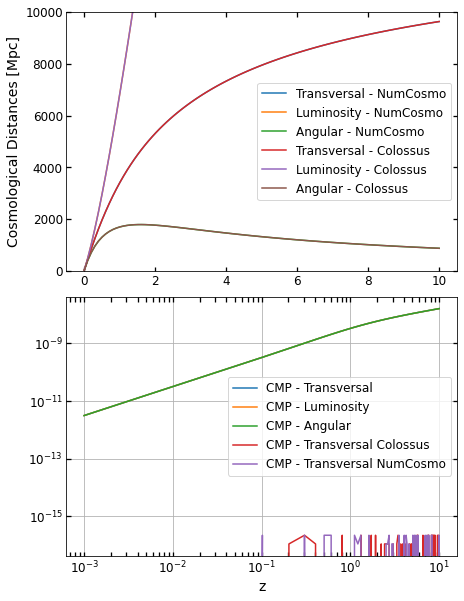

In [25]:
# NumCosmo
transv_list = []
lumin_list  = []
ang_list    = []
transv_list2 = []

# Colossus
transv_col_list = []
lumin_col_list  = []
ang_col_list    = []
transv_col_list2 = []

t_0 = time.time ()
for z in z_list:
    transv = dist.transverse (cosmo, z)* cosmo.RH_Mpc ()
    transv_list.append (transv)
t_1 = time.time ()
    
transv_col = cosmo_col.comovingDistance (z_max=z_list, transverse=True)/cosmo.h ()
t_2 = time.time ()
for z in z_list:    
    lumin  = dist.luminosity (cosmo, z)* cosmo.RH_Mpc ()
    lumin_list.append (lumin)
t_3 = time.time ()
    
lumin_col = cosmo_col.luminosityDistance (z_list)/cosmo.h ()
t_4 = time.time ()
for z in z_list:    
    ang    = dist.angular_diameter (cosmo, z) * cosmo.RH_Mpc ()
    ang_list.append (ang)
    # NumCosmo Precision
    transv_2 = (ang) * (1 + z)
    transv_list2.append(transv_2)
t_5 = time.time ()

ang_col = cosmo_col.angularDiameterDistance (z_list)/cosmo.h ()
t_6 = time.time ()

array_l = np.array (lumin_list)
array_t = np.array (transv_list)
array_t2 = np.array (transv_list2)
array_a = np.array (ang_list)

# Colossus Precision
transv_col_2 = (ang_col) * (1 + z_list) 

plt.figure()
fig, axs = plt.subplots (2, sharex=False, gridspec_kw={'hspace':0.1}, figsize=(7,10))

axs[0].set_ylim(0, 10000)
#axs[0].set_xlim(0, 400)
#axs[0].set_yscale ('log')
#axs[1].set_xscale ('log')
axs[0].set_ylabel ("Cosmological Distances [Mpc]")
axs[0].plot (z_list, transv_list, '-', lw=1.5, label= 'Transversal - NumCosmo')
axs[0].plot (z_list, lumin_list, '-', lw=1.5, label = 'Luminosity - NumCosmo')
axs[0].plot (z_list, ang_list, '-', lw=1.5, label = 'Angular - NumCosmo')
axs[0].plot (z_list, transv_col, '-', lw=1.5, label = 'Transversal - Colossus')
axs[0].plot (z_list, lumin_col, '-', lw=1.5, label = 'Luminosity - Colossus')
axs[0].plot (z_list, ang_col, '-', lw=1.5, label = 'Angular - Colossus')
axs[0].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[0].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[0].legend(loc='best')

axs[1].set_xlabel ("z")
axs[1].set_yscale ('log')
axs[1].set_xscale ('log')
axs[1].plot (z_list, np.abs(transv_col/array_t - 1.0), '-', lw=1.5, label = 'CMP - Transversal')
axs[1].plot (z_list, np.abs(lumin_col/array_l - 1.0), '-', lw=1.5, label = 'CMP - Luminosity')
axs[1].plot (z_list, np.abs(ang_col/array_a - 1.0), '-', lw=1.5, label = 'CMP - Angular')
axs[1].plot (z_list, np.abs(transv_col/transv_col_2 - 1.0), '-', lw=1.5, label = 'CMP - Transversal Colossus')
axs[1].plot (z_list, np.abs(array_t/array_t2 - 1.0), '-', lw=1.5, label = 'CMP - Transversal NumCosmo')
axs[1].tick_params(which='major', direction='in', right=True, top=True, length=4.5, width=1.3, labelsize= 12)
axs[1].tick_params(which='minor', direction='in', right=True, top=True, length=4.5, width=1.3)
axs[1].legend(loc='best')
axs[1].grid ()

plt.savefig("trasversal_first.pdf", dpi=300, bbox_inches="tight")

*RunTime*

In [24]:
print('#----------------------------------------------------------------------------------')
print('# Transverse Distance, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(t_1 - t_0))
print('# - Colossus: \t %e ' %(t_2 - t_1))
print('#----------------------------------------------------------------------------------')
print('# Luminosity Distance, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(t_3 - t_2))
print('# - Colossus: \t %e ' %(t_4 - t_3))
print('#----------------------------------------------------------------------------------')
print('# Angular Diameter Distance, runtime in seconds ')
print('#----------------------------------------------------------------------------------')
print('# - NumCosmo: \t %e ' %(t_5 - t_4))
print('# - Colossus: \t %e ' %(t_6 - t_5))

#----------------------------------------------------------------------------------
# Transverse Distance, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 1.344204e-03 
# - Colossus: 	 2.579927e-02 
#----------------------------------------------------------------------------------
# Luminosity Distance, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 5.805492e-04 
# - Colossus: 	 1.834416e-02 
#----------------------------------------------------------------------------------
# Angular Diameter Distance, runtime in seconds 
#----------------------------------------------------------------------------------
# - NumCosmo: 	 1.219034e-03 
# - Colossus: 	 2.425766e-02 
